In [2]:
import numpy as np
import os

D = 2
L = 64
lc_bin = [1.5, 2]
lc_mg = [2, 4]
ec = [1, 2]
ec_label = ['NS', 'ICS', 'HCS', 'LCS']

rdir = '/media/chris/1de8e06b-6292-4b78-bf9f-1c77386567351/projects/0_connectivity paper/2d/2dcon_128/2/'
file_name_mg = ['mg_lc2_ns', 'mg_lc2_inter', 'mg_lc2_high', 'mg_lc2_low']

realizations = 128

In [ ]:
# Numpy file creation (.npy)
X = np.empty((realizations, 64, 64, 1), dtype=np.float64)
Y = np.zeros((realizations, 1), dtype=np.float64)
print('X shape:', X.shape,'\n''Y shape:', Y.shape)

for ir in range(realizations):
    x = np.load(rdir + str(ir) + '/KpostProcess/Kperm16.npy')
    y = np.loadtxt(rdir + str(ir) + '/SolverRes.txt')[0]
    X[ir] = x
    Y[ir] = y
np.save(f'X_64L_mg_hc_var2_lc16.npy', X)
np.save(f'Y_64L_mg_hc_var2_lc16.npy', Y)

In [ ]:
print(os.getcwd())
kmap2= np.load(os.getcwd() + '/X_64L_mg_ic_var1_lc16.npy')
print(kmap2, kmap2.shape)

In [ ]:
import matplotlib.pyplot as plt

ml_map = np.load(os.getcwd() + '/julian/linear_interp.npy')
ml_map2 = np.load(os.getcwd() + '/julian/manifold_interp.npy')
ml_map3 = np.load(os.getcwd() + '/julian/interp_manifold_true_images_at_borders.npy')

print(ml_map.shape)
print(ml_map2.shape)
print(ml_map3.shape)

a = np.mean(ml_map2[0])
b = np.mean(ml_map2[1])

print(a == b)

plt.imshow(ml_map3[0])
plt.show()
plt.imshow(ml_map3[2])
plt.show()
plt.imshow(ml_map3[6])
plt.show()

plt.figure(figsize=(30, 45))
plt.imshow(ml_map)

In [28]:
### Binarization

K = 10e2
k = 10e-2
kt = 0
cwd = os.getcwd()

for file in os.listdir(cwd):
    if file.endswith('.npy'):
        file_path = os.path.join(cwd, file)
        k_mg = np.load(file_path)
        k_mg = np.log(k_mg)
        # Binarization
        k_bin = np.where(k_mg < kt, k, K)
        np.save(os.path.join(cwd, file.replace('.npy', '_bin.npy')), k_bin)


In [12]:
# Rename

cwd = os.getcwd()

# Iterate through all files in the current working directory
for filename in os.listdir(cwd):
    if '_mg' in filename:
        # Construct the old and new file paths
        old_file_path = os.path.join(cwd, filename)
        new_filename = filename.replace('_mg', '')
        new_file_path = os.path.join(cwd, new_filename)
        
        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed {filename} to {new_filename}")

['/home/chris/projects/ml/Y-TEC/Y_64L_mg_hc_var0.5_lc16.npy', '/home/chris/projects/ml/Y-TEC/Y_64L_mg_hc_var2_lc16.npy', '/home/chris/projects/ml/Y-TEC/Y_64L_mg_ic_var2_lc16_bin.npy', '/home/chris/projects/ml/Y-TEC/Y_64L_mg_ic_var1_lc16_bin.npy', '/home/chris/projects/ml/Y-TEC/X_64L_mg_hc_var2_lc16_bin.npy', '/home/chris/projects/ml/Y-TEC/X_64L_mg_ic_var2_lc16.npy', '/home/chris/projects/ml/Y-TEC/X_64L_mg_hc_var1_lc16.npy', '/home/chris/projects/ml/Y-TEC/X_64L_mg_hc_var0.5_lc16.npy', '/home/chris/projects/ml/Y-TEC/X_64L_mg_ic_var2_lc16_bin.npy', '/home/chris/projects/ml/Y-TEC/Y_64L_mg_ic_var0.5_lc16_bin.npy', '/home/chris/projects/ml/Y-TEC/Y_64L_mg_ic_var1_lc16.npy', '/home/chris/projects/ml/Y-TEC/Y_64L_mg_hc_var1_lc16.npy', '/home/chris/projects/ml/Y-TEC/X_64L_mg_ic_var1_lc16.npy', '/home/chris/projects/ml/Y-TEC/Y_64L_mg_ic_var2_lc16.npy', '/home/chris/projects/ml/Y-TEC/X_64L_mg_hc_var2_lc16.npy', '/home/chris/projects/ml/Y-TEC/Y_64L_mg_ic_var0.5_lc16.npy', '/home/chris/projects/ml/Y-

(128, 64, 64, 1) [[[[1.e-01]
   [1.e+03]
   [1.e-01]
   ...
   [1.e-01]
   [1.e+03]
   [1.e+03]]

  [[1.e-01]
   [1.e+03]
   [1.e+03]
   ...
   [1.e-01]
   [1.e-01]
   [1.e+03]]

  [[1.e+03]
   [1.e-01]
   [1.e-01]
   ...
   [1.e+03]
   [1.e-01]
   [1.e+03]]

  ...

  [[1.e+03]
   [1.e-01]
   [1.e-01]
   ...
   [1.e+03]
   [1.e+03]
   [1.e+03]]

  [[1.e-01]
   [1.e+03]
   [1.e-01]
   ...
   [1.e+03]
   [1.e+03]
   [1.e+03]]

  [[1.e+03]
   [1.e+03]
   [1.e-01]
   ...
   [1.e+03]
   [1.e+03]
   [1.e+03]]]


 [[[1.e+03]
   [1.e+03]
   [1.e-01]
   ...
   [1.e+03]
   [1.e+03]
   [1.e+03]]

  [[1.e+03]
   [1.e-01]
   [1.e+03]
   ...
   [1.e+03]
   [1.e+03]
   [1.e+03]]

  [[1.e+03]
   [1.e+03]
   [1.e-01]
   ...
   [1.e-01]
   [1.e+03]
   [1.e+03]]

  ...

  [[1.e-01]
   [1.e+03]
   [1.e-01]
   ...
   [1.e+03]
   [1.e-01]
   [1.e+03]]

  [[1.e+03]
   [1.e+03]
   [1.e+03]
   ...
   [1.e-01]
   [1.e+03]
   [1.e+03]]

  [[1.e+03]
   [1.e+03]
   [1.e+03]
   ...
   [1.e+03]
   [1.e-01]
   [1.e+0

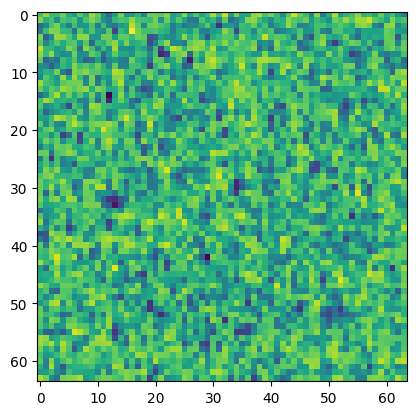

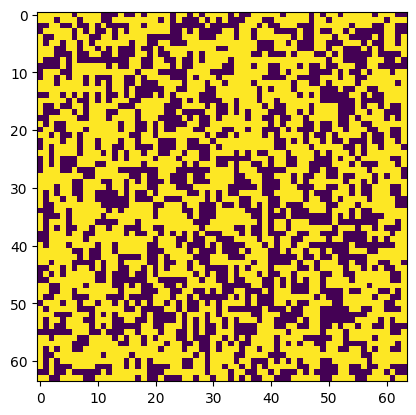

In [7]:
import matplotlib.pyplot as plt

bin = np.load('/home/chris/projects/ml/Y-TEC/X_64L_hc_var2_lc16_bin.npy')
mg = np.load('/home/chris/projects/ml/Y-TEC/X_64L_hc_var2_lc16.npy')
print(bin.shape, bin)


plt.imshow(np.log(mg[100]))
plt.show()
plt.imshow(bin[100])
plt.show()